In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\marwa\Downloads\registered_nuisance.csv")
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    cleaned_data = data[~outliers]
    return cleaned_data

# Example usage:
data = np.array([1, 2, 3, 10, 4, 5, 100, 6, 7, 8])

cleaned_data = remove_outliers_zscore(data)

print("Original Data:", data)
print("Cleaned Data:", cleaned_data)


Original Data: [  1   2   3  10   4   5 100   6   7   8]
Cleaned Data: [  1   2   3  10   4   5 100   6   7   8]


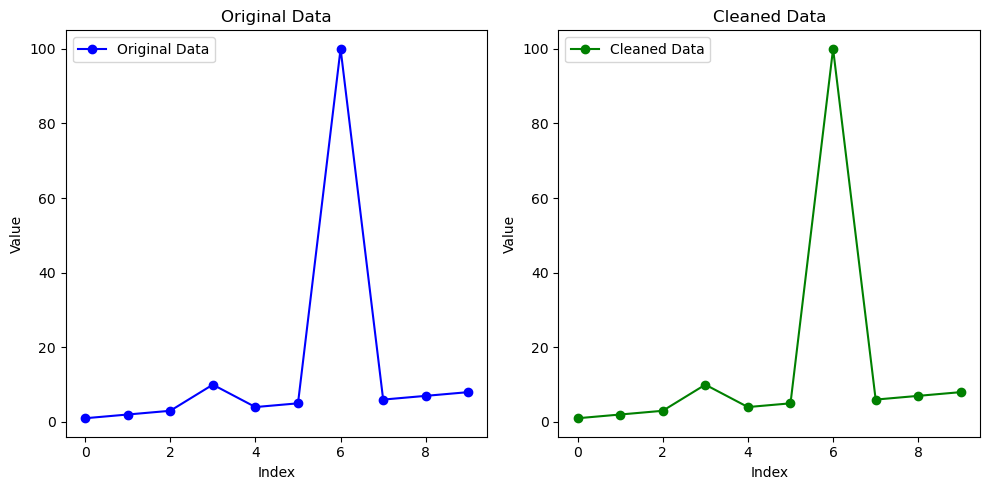

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    cleaned_data = data[~outliers]
    return cleaned_data

# Example usage:
data = np.array([1, 2, 3, 10, 4, 5, 100, 6, 7, 8])

cleaned_data = remove_outliers_zscore(data)

# Plotting the original data and cleaned data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(data, 'bo-', label='Original Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cleaned_data, 'go-', label='Cleaned Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Cleaned Data')
plt.legend()

plt.tight_layout()
plt.show()



In [4]:
import numpy as np

def detect_anomalies_zscore(data, threshold=3.0):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    anomalies = np.where(np.abs(z_scores) > threshold)[0]
    return anomalies


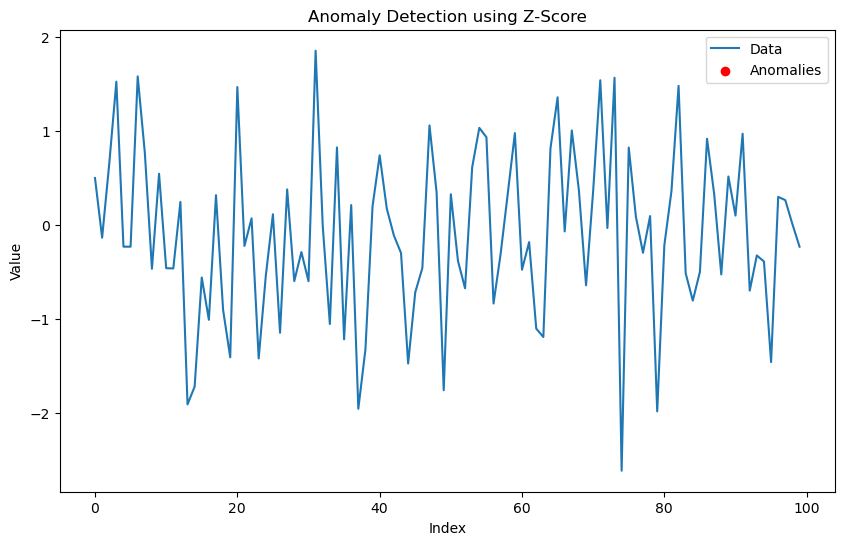

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def detect_anomalies_zscore(data, threshold=3.0):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    anomalies = np.where(np.abs(z_scores) > threshold)[0]
    return anomalies

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)

# Detect anomalies using Z-Score
anomalies = detect_anomalies_zscore(data, threshold=3.0)

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.scatter(anomalies, data[anomalies], color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Anomaly Detection using Z-Score')
plt.legend()
plt.show()


In [5]:
from sklearn.neighbors import LocalOutlierFactor

def detect_anomalies_lof(data, neighbors=20, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=neighbors, contamination=contamination)
    anomalies = lof.fit_predict(data)
    return np.where(anomalies == -1)[0]


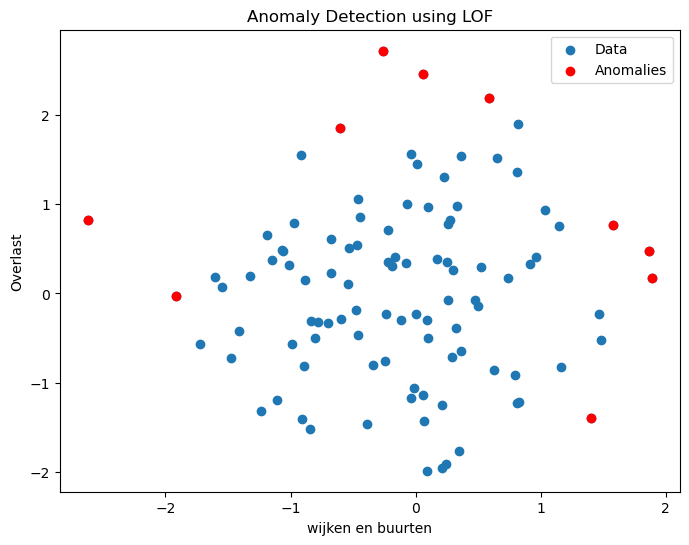

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def detect_anomalies_lof(data, neighbors=20, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=neighbors, contamination=contamination)
    anomalies = lof.fit_predict(data)
    return np.where(anomalies == -1)[0]

# Generate sample data
np.random.seed(42)
data = np.random.randn(100, 2)

# Detect anomalies using LOF
anomalies = detect_anomalies_lof(data, neighbors=20, contamination=0.1)

# Plot the data and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Data')
plt.scatter(data[anomalies, 0], data[anomalies, 1], color='red', label='Anomalies')
plt.xlabel('wijken en buurten')
plt.ylabel('Overlast')
plt.title('Anomaly Detection using LOF')
plt.legend()
plt.show()


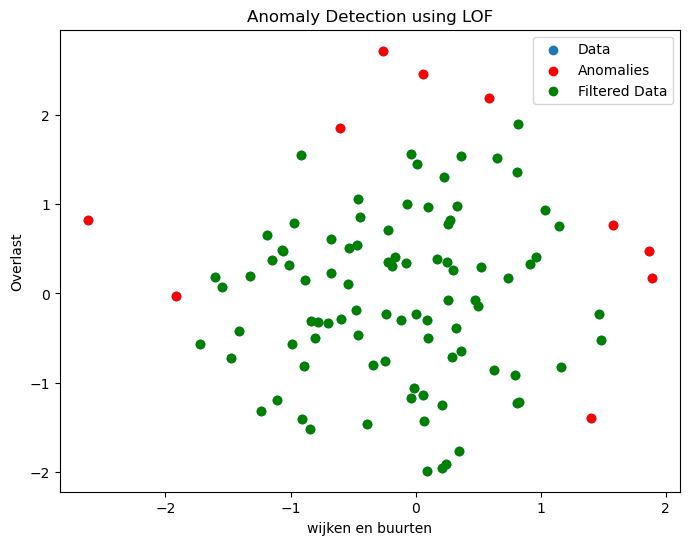

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def detect_anomalies_lof(data, neighbors=20, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=neighbors, contamination=contamination)
    anomalies = lof.fit_predict(data)
    return np.where(anomalies == -1)[0]

# Generate sample data
np.random.seed(42)
data = np.random.randn(100, 2)

# Detect anomalies using LOF
anomalies = detect_anomalies_lof(data, neighbors=20, contamination=0.1)

# Remove outliers
filtered_data = np.delete(data, anomalies, axis=0)

# Plot the data and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Data')
plt.scatter(data[anomalies, 0], data[anomalies, 1], color='red', label='Anomalies')
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], color='green', label='Filtered Data')
plt.xlabel('wijken en buurten')
plt.ylabel('Overlast')
plt.title('Anomaly Detection using LOF')
plt.legend()
plt.show()



In [24]:
import numpy as np

def find_anomalies_zscore(data, threshold=3):
    """
    Find anomalies in a numerical dataset using the z-score method.

    Args:
        data (numpy.ndarray): Input numerical dataset.
        threshold (float): Threshold value for the z-score. Data points with a z-score higher than this threshold
                           will be considered anomalies. Default is 3, which is a common choice.

    Returns:
        numpy.ndarray: An array of indices where anomalies are found.
    """
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    z_scores = np.abs((data - mean) / std)
    anomalies = np.where(z_scores > threshold)
    return anomalies

# Example usage:
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9],
                 [10, 11, 12],
                 [100, 200, 300]])

anomalies = find_anomalies_zscore(data)
print("Anomalies found at indices:", anomalies)



Anomalies found at indices: (array([], dtype=int64), array([], dtype=int64))


In [9]:
import numpy as np
from sklearn.svm import OneClassSVM

def detect_anomalies_oneclasssvm(data, nu=0.1):
    clf = OneClassSVM(nu=nu)
    clf.fit(data)
    anomalies = clf.predict(data)
    return np.where(anomalies == -1)[0]

# Example usage
data = np.array([[1, 2], [1, 4], [1, 8], [4, 2], [4, 4], [4, 8], [6, 2], [6, 4], [6, 8]])
anomaly_indices = detect_anomalies_oneclasssvm(data, nu=0.1)
print("Anomaly indices:", anomaly_indices)


Anomaly indices: [0 2 6 7]
